Data preview:
   Activity, Exercise or Sport (1 hour)  130 lb  155 lb  180 lb  205 lb  \
0          Cycling, mountain bike, bmx     502     598     695     791   
1  Cycling, <10 mph, leisure bicycling     236     281     327     372   
2             Cycling, >20 mph, racing     944    1126    1308    1489   
3          Cycling, 10-11.9 mph, light     354     422     490     558   
4       Cycling, 12-13.9 mph, moderate     472     563     654     745   

   Calories per kg  
0         1.750730  
1         0.823236  
2         3.294974  
3         1.234853  
4         1.647825   

=== Evaluasi Model ===
Koefisien (slope) : 286.4349
Intercept         : 0.2128
R² Score          : 1.0000
MSE               : 0.0345



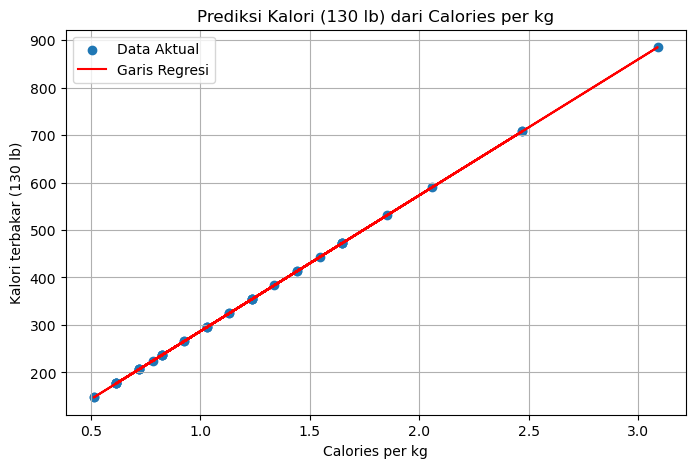

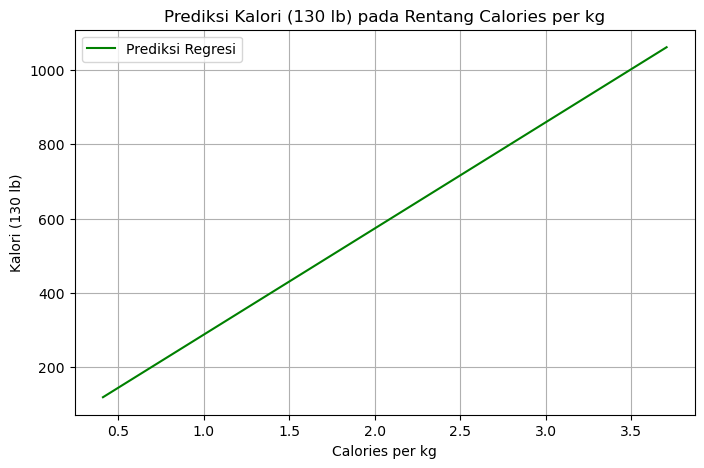

In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 2. Load Data
df = pd.read_csv('dataset200.csv')  # pastikan file ada di working directory
print("Data preview:\n", df.head(), "\n")

# 3. Fitur & Target
#    Kita buang dulu kolom Activity yang non-numerik
df_num = df.drop(columns=['Activity, Exercise or Sport (1 hour)'])
X = df_num[['Calories per kg']]  # fitur
y = df_num['130 lb']             # target

# 4. Split Data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Buat Model & Latih
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Prediksi
y_pred = model.predict(X_test)

# 7. Evaluasi Model
print("=== Evaluasi Model ===")
print(f"Koefisien (slope) : {model.coef_[0]:.4f}")
print(f"Intercept         : {model.intercept_:.4f}")
print(f"R² Score          : {r2_score(y_test, y_pred):.4f}")
print(f"MSE               : {mean_squared_error(y_test, y_pred):.4f}\n")

# 8. Visualisasi Hasil
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, label='Data Aktual')
plt.plot(X_test, y_pred, color='red', label='Garis Regresi')
plt.title('Prediksi Kalori (130 lb) dari Calories per kg')
plt.xlabel('Calories per kg')
plt.ylabel('Kalori terbakar (130 lb)')
plt.legend()
plt.grid(True)
plt.show()

# 9. Prediksi Baru (range Calories per kg dari min–max)
X_new = pd.DataFrame({
    'Calories per kg': np.linspace(df_num['Calories per kg'].min(),
                                   df_num['Calories per kg'].max(), 100)
})
y_new = model.predict(X_new)

plt.figure(figsize=(8,5))
plt.plot(X_new, y_new, color='green', label='Prediksi Regresi')
plt.title('Prediksi Kalori (130 lb) pada Rentang Calories per kg')
plt.xlabel('Calories per kg')
plt.ylabel('Kalori (130 lb)')
plt.legend()
plt.grid(True)
plt.show()
